Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

The below graph shows the mean CDLR (Equity/Assets) for all banks over time.

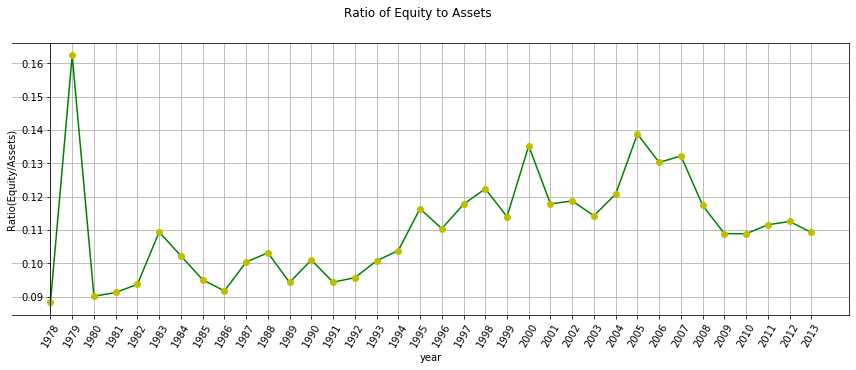

In [3]:
%matplotlib inline
import numpy as np
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = df_raw[["name","qavgassets",'year', "quarter", "equity"]]
df_allyears = df.loc[df["quarter"]==4]
#df_allyears["CBLR"] = df_allyears["equity"]/df_allyears["qavgassets"]
temp_series = df_allyears["equity"]/df_allyears["qavgassets"]
df_allyears.insert(loc=5, column = "CBLR", value= temp_series)
df_allyears.CBLR.replace([np.inf, -np.inf], np.nan, inplace=True)
df_allyears.dropna(how="all", subset=["CBLR"],inplace=True)
year = 1978
array = []

for i in range(36):
    temp_df = df_allyears.copy()
    temp_df = temp_df.loc[temp_df.year==year].copy()
    mean = temp_df["CBLR"].mean()
    array.append(mean)
    year = year + 1

#print(array)
npArray = np.array(array)
#plt.figure(figsize=(15,10))
years = [str(year) for year in range(1978, 2014)]
series = pd.Series(npArray, index=years)
#print(years)
'''
index = np.arange(len(years))
plt.xticks(index, years, rotation=60)
bar_width = 0.9
plt.plot(index, npArray, bar_width)
#plt.show()
#print(len(npArray))
#print(npArray)
'''
fig, ax = plt.subplots(figsize=(15,5))

fig.suptitle("Ratio of Equity to Assets")
ax.set_xlabel("year")
ax.set_ylabel("Ratio(Equity/Assets)")
ax.set_xticklabels(years, rotation=60)
ax.spines['left'].set_position(("data", 0))
#ax.spines["bottom"].set_position(("data",0))
ax.plot(series, "g-")
ax.plot(series, "oy")
plt.grid(True)

Leverage Ratio: Assets/Equity

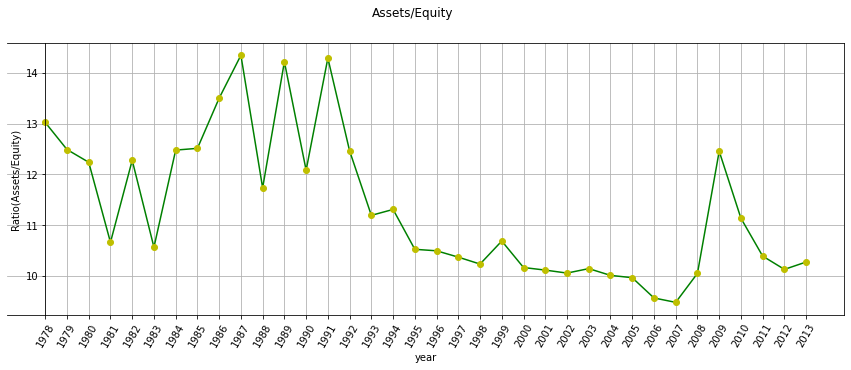

In [12]:
df = df_raw[["name","qavgassets",'year', "quarter", "equity"]]
df_allyears = df.loc[df["quarter"]==4]
#df_allyears["CBLR"] = df_allyears["equity"]/df_allyears["qavgassets"]
temp_series = df_allyears["qavgassets"]/df_allyears["equity"]
df_allyears.insert(loc=5, column = "CBLR", value= temp_series)
df_allyears.CBLR.replace([np.inf, -np.inf], np.nan, inplace=True)
df_allyears.dropna(how="all", subset=["CBLR"],inplace=True)
year = 1978
array = []

for i in range(36):
    temp_df = df_allyears.copy()
    temp_df = temp_df.loc[temp_df.year==year].copy()
    mean = temp_df["CBLR"].mean()
    array.append(mean)
    year = year + 1

#print(array)
npArray = np.array(array)
#plt.figure(figsize=(15,10))
years = [str(year) for year in range(1978, 2014)]
series = pd.Series(npArray, index=years)
#print(years)
'''
index = np.arange(len(years))
plt.xticks(index, years, rotation=60)
bar_width = 0.9
plt.plot(index, npArray, bar_width)
#plt.show()
#print(len(npArray))
#print(npArray)
'''
fig, ax = plt.subplots(figsize=(15,5))

fig.suptitle("Assets/Equity")
ax.set_xlabel("year")
ax.set_ylabel("Ratio(Assets/Equity)")
ax.set_xticklabels(years, rotation=60)
ax.spines['left'].set_position(("data", 0))
#ax.spines["bottom"].set_position(("data",0))
ax.plot(series, "g-")
ax.plot(series, "oy")
plt.grid(True)

The below graph shows the aggregate equity to quarterly assets over time.

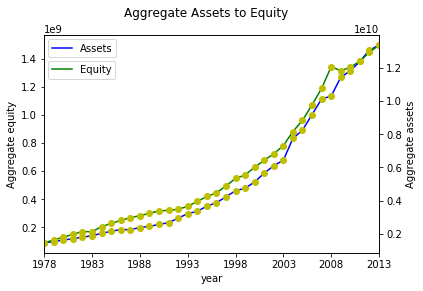

In [5]:

year = 1978
arrayAggEquity = []
arrayAggAssets = []

for i in range(36):
    temp_df = df_allyears.copy()
    temp_df = temp_df[(temp_df["year"]==year)]
    sumEquity = temp_df.equity.sum()
    sumAssets = temp_df.qavgassets.sum()
    arrayAggEquity.append(sumEquity)
    arrayAggAssets.append(sumAssets)
    year = year + 1

#print(arrayAggEquity)
#print(arrayAggAssets)
years = [str(year) for year in range(1978, 2014)]
d1 = {"Equity" : arrayAggEquity, "Assets": arrayAggAssets}
temp_df = pd.DataFrame(data=d1, index=years)
fig, ax = plt.subplots()
fig.suptitle("Aggregate Assets to Equity")
ax.set_ylabel("Aggregate equity")
ax.set_xlabel("year")
ax2 = ax.twinx()
ax2.set_ylabel("Aggregate assets")
line1 = temp_df.Equity.plot(ax=ax, style="b-")
line1 = temp_df.Equity.plot(ax=ax, style="oy")
line2 = temp_df.Assets.plot(ax=ax2, style="g-")
line2 = temp_df.Assets.plot(ax=ax2, style="oy")
#ax.set_xticklabels(temp_df.index, rotation=60)
ax.legend(["qavgassets"])
ax2.legend(["equity"])
ax.legend(["Assets"], loc=(0.01, 0.9))
ax2.legend(["Equity"], ncol=2 ,loc=(0.01, 0.8))

Aggregate Assets to Equity on one axis.

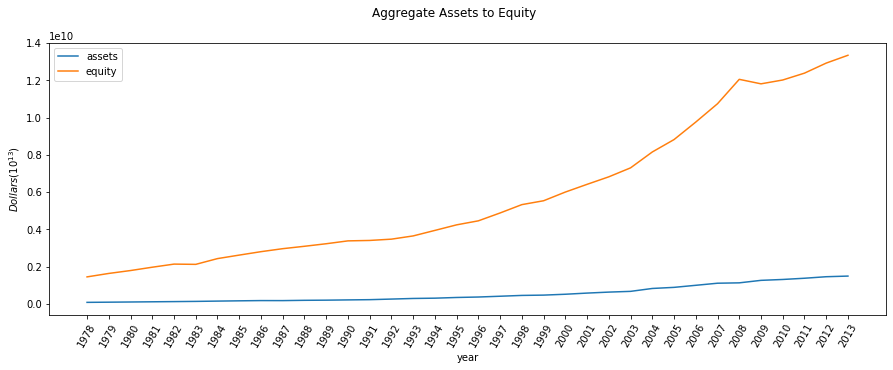

In [6]:
df_assetsEquity = temp_df.copy()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xticklabels(years,rotation=60)
fig.suptitle("Aggregate Assets to Equity")
ax.plot(temp_df)
ax.set_ylabel("$Dollars (10^{13})$")
ax.set_xlabel("year")
d

Aggregate Assets to Equity fokus on 2000-2013 on two axes.

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'], dtype='object')


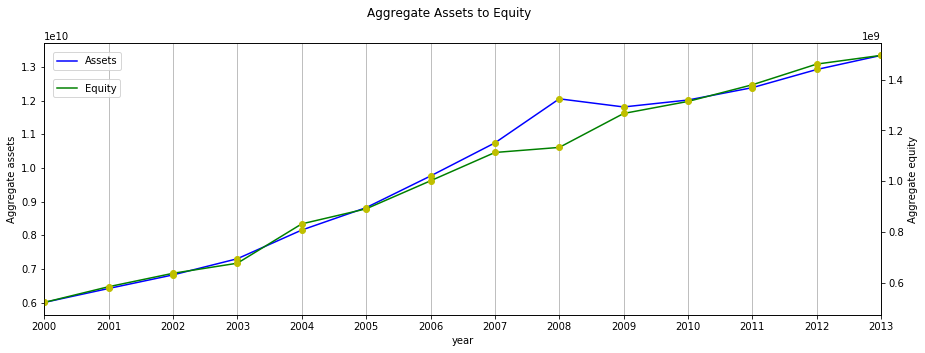

In [7]:
df_assetsEquity = temp_df.copy()
df_00to13 = df_assetsEquity.iloc[22:36,:]
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Aggregate Assets to Equity")
ax.set_ylabel("Aggregate assets")
ax.set_xlabel("year")
ax2 = ax.twinx()
ax2.set_ylabel("Aggregate equity")
print(df_00to13.index)
line1 = df_00to13.Assets.plot(ax=ax, style="b-", use_index=True)
line1 = df_00to13.Assets.plot(ax=ax, style="oy", use_index=True)
line2 = df_00to13.Equity.plot(ax=ax2, style="g-", use_index=True)
line2 = df_00to13.Equity.plot(ax=ax2, style="oy", use_index=True)
plt.xticks(range(len(df_00to13.index)), df_00to13.index)
ax.xaxis.grid()
ax.legend(["Assets"], loc=(0.01, 0.9))
ax2.legend(["Equity"], ncol=2 ,loc=(0.01, 0.8))

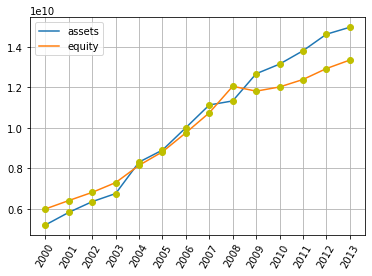

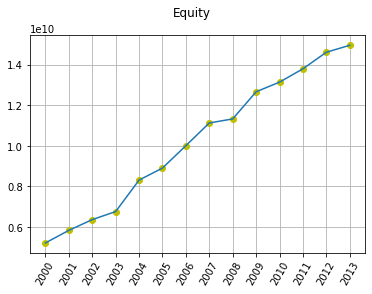

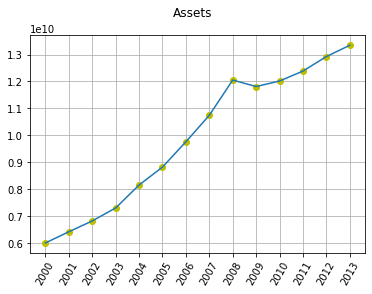

In [8]:
temp_df_00to13 = df_00to13.copy()
temp_df_00to13.Equity = temp_df_00to13.Equity*10
fig, ax = plt.subplots()
ax.plot(temp_df_00to13, "",
       temp_df_00to13, "oy")
plt.grid()
ax.set_xticklabels(years[22:36], rotation=60)
ax.legend(["assets", "equity"])
fig1, ax1 = plt.subplots()
ax1.plot(temp_df_00to13.Equity, "oy",temp_df_00to13.Equity )
fig1.suptitle("Equity")
ax1.set_xticklabels(temp_df_00to13.index, rotation=60)
plt.grid()
fig2, ax2 = plt.subplots()
ax2.plot(temp_df_00to13.Assets, "oy", temp_df_00to13.Assets)
ax2.set_xticklabels(temp_df_00to13.index, rotation=60)
fig2.suptitle("Assets")
plt.grid()

Detail look into equity to assets comparison on in year 2005,2006,2007,2008,2009. Equity is multiplied by 10.

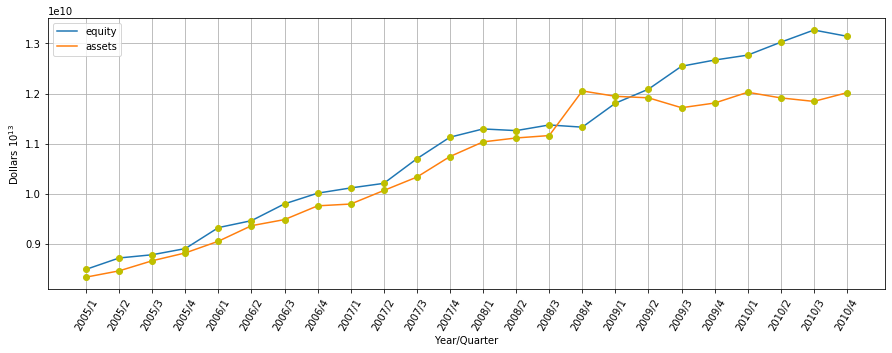

In [9]:
df_crisis = df[(df.year>2004) & (df.year<2011)]
#df_crisis.set_index(["year", "quarter"], inplace=True)
df_crisis.sort_values(by=["year", "quarter"])
arrayAggEquity=[]
arrayAggAssets=[]
index = df_crisis[["year", "quarter"]]
index = index.drop_duplicates()
index = index[["year", "quarter"]].astype(int)
arrayIndex = []
for row in index.itertuples():
    dictRow = row._asdict()
    arrayIndex.append(str(dictRow["year"]) + "/" + str(dictRow["quarter"]))

#print(arrayIndex)
year = 2005
quarter = 1
for i in range(6):
    #print(year)
    temp_df1 = df_crisis.copy()
    #temp_df1 = temp_df1[(temp_df1["year"]==year)]
    for y in range(4):
        temp_df2 = temp_df1[(temp_df1["quarter"]==quarter) & (temp_df1["year"]==year)]
        #print(temp_df1)
        #print(quarter)
        sumEquity = temp_df2.equity.sum()
        sumAssets = temp_df2.qavgassets.sum()
        arrayAggEquity.append(sumEquity)
        arrayAggAssets.append(sumAssets)
        quarter = quarter + 1
    year = year + 1
    quarter = 1
#print(len(arrayAggEquity))
d2 = {"Equity" : arrayAggEquity, "Assets": arrayAggAssets}
temp_df = pd.DataFrame(data=d2, index=arrayIndex)

temp_df.Equity = temp_df.Equity*10
#arrayAggEquity
fig, ax = plt.subplots(figsize=(15,5))
#df_crisis
# years = [str(year) for year in range(2005, 2009)]
#plt.xticks()
ax.set_xticklabels(arrayIndex, rotation=60)
ax.plot(temp_df, "",
       temp_df, "oy")
plt.grid()
ax.set_xlabel("Year/Quarter")
ax.set_ylabel("Dollars $10^{13}$")
ax.legend(["equity", "assets"])

<BarContainer object of 24 artists>

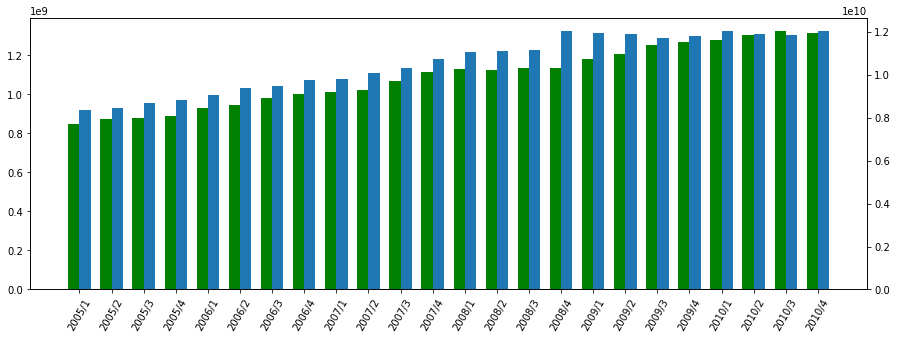

In [10]:
x = np.arange(len(arrayIndex))
width = 0.35
temp_df.Equity = temp_df.Equity/10
fig, ax = plt.subplots(figsize=(15,5))
ax2 = ax.twinx()
ax.set_xticks(x)
ax.set_xticklabels(arrayIndex, rotation=60)
ax.bar(x - width/2, temp_df.Equity, width, label='Equity', color="g")
ax2.bar(x + width/2, temp_df.Assets, width, label="Assets")


In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter
#print(df_2009.CBLR.dtypes)
plt.figure(figsize=(20,15))
#fig = fig.size(15,5)
n, bins, patches = plt.hist(df_2009.CBLR, bins=50, density=True, edgecolor="#6A9662",color="#DDFFDD")
ax1 = plt.gca()
plt.xticks(bins, rotation=60)

NameError: name 'df_2009' is not defined

<Figure size 1440x1080 with 0 Axes>